<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

Фиксирование сидов необходимо для того, чтобы была возможность воспроизведения полученного результата

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [28]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [29]:
df_train.info()
df_train.columns[df_train.isna().any()].tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


['mileage', 'engine', 'max_power', 'torque', 'seats']

In [30]:
df_train[df_train.duplicated()]

name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
326             Jaguar XF 2.0 Diesel Portfolio  2017        3200000   
...                                        ...   ...            ...   
6880             Renault Captur 1.5 Diesel RXT  2018        1265000   
6881                  Maruti Ciaz Alpha Diesel  2019        1025000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9 kmpl   
258       50000  Petrol  Individual       Manual  Second Owner   18.6 kmpl   
324        9000  Diesel      Dealer    Automatic   First Owner   13.6 kmpl   
325       20000  Petrol      Dealer    Automatic   First Owner  22.37 kmpl   
326       45000  Diesel      Dealer    Automatic   First Owner  19.33 kmpl   
...         ...     ...         ...          ...           ...         ...   
6880      12000  Diesel  Individual       Manual   First Owner  20.37 kmpl   
6881      32000  Diesel  Individual       Manual   First Owner  28.09 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine   max_power               torque  seats  
254   1197 CC      82 bhp       114Nm@ 4000rpm    5.0  
258   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
324   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
325   2487 CC  214.56 bhp  202Nm@ 3600-5200rpm    5.0  
326   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
...       ...         ...                  ...    ...  
6880  1461 CC  108.45 bhp       240Nm@ 1750rpm    5.0  
6881  1248 CC   88.50 bhp       200Nm@ 1750rpm    5.0  
6989  1248 CC      74 bhp       190Nm@ 2000rpm    5.0  
6997  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  
6998  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  

[985 rows x 13 columns]

In [31]:
from ydata_profiling import ProfileReport

In [32]:
ProfileReport(df_train, title="Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

В данных для обучения 6999 строк, присутствуют пропуски и дубликаты

В поле name отсутствуют пропущенные значения, 1924 уникальных объекта<br>
В датасете представлены данные по АМ, которые были выпущены в период 1983-2020 гг. Для каждой АМ указан год выпуска<br>
Цена продажи варьирует от 29999 до 10000000, пропуски отсутствуют<br>
Средний пробег АМ - 69585 км. Для каждой АМ указан пробег<br>
Для каждой АМ указан тип топлива, которых всего 4 (Diesel, Petrol, CNG, LPG). Доля дизельных АМ превышает долю бензиновых АМ. Для каждой АМ указан тип топлива<br>
Для каждой АМ указан тип продавца. Доля частных лиц значимо превышает долю дилеров<br>
Для каждой АМ указан тип корбки передач. Доля ручной коробки передач превышает долю автоматической коробки передач<br>
Доля каждой АМ указано кол-во владельцев. Наибольшая доля АМ с одним владельцем<br>
Есть пропуски данных в поле с расходом топлива, которые отображаются как кол-во км на 1 л<br>
Не для каждой АМ указан объем двигателя, мощность и крутящий момент<br>
Также есть пропуски в поле с количеством сидений<br>

Можно увидеть сильную прямую взаимосвязь между следующими признаками:
* Ценой продажи и годом выпуска АМ
* Ценой продажи и трансмиссией

Можно увидеть сильную обратную взаимосвязь между следующими признаками:
* Год выпуска АМ и пробег
* Год выпуска АМ и цена продажи

В датасете присутствует 493 уникальных строки с дубликатами<br>
Всего дубликатов в датасете - 985 строк

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [9]:
df_train.describe()

year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [10]:
df_test.describe()

year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

In [11]:
df_train.describe(include='object')

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

In [12]:
df_test.describe(include='object')

name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

In [13]:
train_year_mean = df_train['year'].mean()
train_price_mean = df_train['selling_price'].mean()
train_km_mean = df_train['km_driven'].mean()
train_seats_mean = df_train['seats'].mean()

test_year_mean = df_test['year'].mean()
test_price_mean = df_test['selling_price'].mean()
test_km_mean = df_test['km_driven'].mean()
test_seats_mean = df_test['seats'].mean()

train_year_median = df_train['year'].median()
train_price_median = df_train['selling_price'].median()
train_km_median = df_train['km_driven'].median()
train_seats_median = df_train['seats'].median()

test_year_median = df_test['year'].median()
test_price_median = df_test['selling_price'].median()
test_km_median = df_test['km_driven'].median()
test_seats_median = df_test['seats'].median()

print(f'Среднее и медиана в train: year: {train_year_mean:.2f} vs {train_year_median:.2f}')
print(f'Среднее и медиана в train: selling price: {train_price_mean:.2f} vs {train_price_median:.2f}')
print(f'Среднее и медиана в train: km driven: {train_km_mean:.2f} vs {train_km_median:.2f}')
print(f'Среднее и медиана в train: seats: {train_seats_mean:.2f} vs {train_seats_median:.2f}')
print('\n')
print(f'Среднее и медиана в test: year: {test_year_mean:.2f} vs {test_year_median:.2f}')
print(f'Среднее и медиана в test: selling price: {test_price_mean:.2f} vs {test_price_median:.2f}')
print(f'Среднее и медиана в test: km driven: {test_km_mean:.2f} vs {test_km_median:.2f}')
print(f'Среднее и медиана в test: seats: {test_seats_mean:.2f} vs {test_seats_median:.2f}')
print('\n')
print(f'Среднее между train и test: year: {train_year_mean:.2f} vs {test_year_mean:.2f}')
print(f'Среднее между train и test: selling price: {train_price_mean:.2f} vs {test_price_mean:.2f}')
print(f'Среднее между train и test: km driven: {train_km_mean:.2f} vs {test_km_mean:.2f}')
print(f'Среднее между train и test: seats: {train_seats_mean:.2f} vs {test_seats_mean:.2f}')
print('\n')
print(f'Медиана между train и test: year: {train_year_median:.2f} vs {test_year_median:.2f}')
print(f'Медиана между train и test: selling price: {train_price_median:.2f} vs {test_price_median:.2f}')
print(f'Медиана между train и test: km driven: {train_km_median:.2f} vs {test_km_median:.2f}')
print(f'Медиана между train и test: seats: {train_seats_median:.2f} vs {test_seats_median:.2f}')

Среднее и медиана в train: year: 2013.82 vs 2015.00
Среднее и медиана в train: selling price: 639515.20 vs 450000.00
Среднее и медиана в train: km driven: 69584.62 vs 60000.00
Среднее и медиана в train: seats: 5.42 vs 5.00


Среднее и медиана в test: year: 2013.68 vs 2014.00
Среднее и медиана в test: selling price: 617901.04 vs 434999.00
Среднее и медиана в test: km driven: 71393.34 vs 61500.00
Среднее и медиана в test: seats: 5.41 vs 5.00


Среднее между train и test: year: 2013.82 vs 2013.68
Среднее между train и test: selling price: 639515.20 vs 617901.04
Среднее между train и test: km driven: 69584.62 vs 71393.34
Среднее между train и test: seats: 5.42 vs 5.41


Медиана между train и test: year: 2015.00 vs 2014.00
Медиана между train и test: selling price: 450000.00 vs 434999.00
Медиана между train и test: km driven: 60000.00 vs 61500.00
Медиана между train и test: seats: 5.00 vs 5.00


Различия между средней и медианой внутри датасета говорят об отклонении от нормального распределения<br>
В train и test наибольшее отклонение от нормального распределения в поле km driven<br>
Значимых отличий в среднем и медиане между train и test нет. Это говорит о том, что разделение данных на train и test проведено корректно и можно ожидать, что оценки качества модели и ошибки на train и test будут похожими

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [14]:
df_train_1 = df_train.drop(['selling_price'], axis = 1)
duplicates = df_train_1[df_train_1.duplicated()]
print(f'Кол-во дубликатов без учета selling price: {duplicates.shape[0]}')
duplicates

Кол-во дубликатов без учета selling price: 1159


name  year  km_driven    fuel  \
254                   Hyundai Grand i10 Sportz  2017      35000  Petrol   
258                           Maruti Swift VXI  2012      50000  Petrol   
268                     Maruti Swift Dzire VXI  2014      70000  Petrol   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017       9000  Diesel   
325                              Lexus ES 300h  2019      20000  Petrol   
...                                        ...   ...        ...     ...   
6947                    Chevrolet Spark 1.0 LS  2010      60000  Petrol   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018      24000  Diesel   
6989                    Maruti Swift Dzire VDI  2015      50000  Diesel   
6997                           Tata Indigo CR4  2013      25000  Diesel   
6998                           Tata Indigo CR4  2013      25000  Diesel   

     seller_type transmission         owner     mileage   engine   max_power  \
254   Individual       Manual   First Owner   18.9 kmpl  1197 CC      82 bhp   
258   Individual       Manual  Second Owner   18.6 kmpl  1197 CC    85.8 bhp   
268   Individual       Manual  Second Owner   19.1 kmpl  1197 CC    85.8 bhp   
324       Dealer    Automatic   First Owner   13.6 kmpl  1999 CC     177 bhp   
325       Dealer    Automatic   First Owner  22.37 kmpl  2487 CC  214.56 bhp   
...          ...          ...           ...         ...      ...         ...   
6947  Individual       Manual  Second Owner   18.0 kmpl   995 CC      62 bhp   
6984  Individual       Manual   First Owner   24.4 kmpl  1498 CC   98.63 bhp   
6989  Individual       Manual   First Owner  26.59 kmpl  1248 CC      74 bhp   
6997  Individual       Manual   First Owner  23.57 kmpl  1396 CC      70 bhp   
6998  Individual       Manual   First Owner  23.57 kmpl  1396 CC      70 bhp   

                   torque  seats  
254        114Nm@ 4000rpm    5.0  
258        114Nm@ 4000rpm    5.0  
268        114Nm@ 4000rpm    5.0  
324   430Nm@ 1750-2500rpm    5.0  
325   202Nm@ 3600-5200rpm    5.0  
...                   ...    ...  
6947      90.3Nm@ 4200rpm    5.0  
6984  215Nm@ 1750-3000rpm    5.0  
6989       190Nm@ 2000rpm    5.0  
6997  140Nm@ 1800-3000rpm    5.0  
6998  140Nm@ 1800-3000rpm    5.0  

[1159 rows x 12 columns]

In [15]:
df_train.drop_duplicates(subset=df_train.drop(['selling_price'], axis = 1), keep='first', inplace=True, ignore_index=True)

In [16]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [17]:
def preprocessing(x):
    if isinstance(x, float) or isinstance(x, int):
        return float(x)

    x = x.split()

    if len(x) == 2:
        return float(x[0])
    elif len(x) == 1 and isinstance(x[0], str) and isinstance(x[0], str):
        return np.nan

for col in ['mileage', 'engine', 'max_power']:
    df_train[col] = df_train[col].apply(lambda x: preprocessing(x))
    df_test[col] = df_test[col].apply(lambda x: preprocessing(x))


In [18]:
def torque_processing(x):
    if isinstance(x, float):
        return np.nan

    x = x.lower()
    for a, b in zip(['~', '@', '(', ')', 'rpm', 'at', ',', '/'], ['-', '', '', '', '', '', '', '']):
        x = x.replace(a, b)

    x = x.strip().split()

    if len(x) == 1:
        x[0] = float(x[0].replace('nm', ''))
        x.append(np.nan)
    elif len(x) == 2:
        if 'nm' in x[0] and 'kgm' in x[0]:
            x[0] = float(max(map(float, x[0].replace('nm', ' ').replace('kgm', ' ').strip().split())))
        elif 'nm' in x[0] and isinstance(x[1], float):
            x[0] = float(x[0].replace('nm', ''))
        elif '+' in x[1]:
            x[1] = float(x[1].split('+')[0])
        elif 'nm' in x[0]:
            x[0] = float(x[0].replace('nm', ''))
        elif 'kgm' in x[0] or 'kgm' in x[1]:
            x[0] = round(float(x[0].replace('kgm', '')) * 9.80665, 2)
            x[1] = x[1].replace('kgm', '')

        if isinstance(x[1], float):
            pass
        elif len(x[1].split('-')) == 2:
            x[1] = sum(map(float, x[1].split('-')))/2
        elif len(x[1].split('-')) == 1:
            x[1] = float(x[1])

    elif len(x) == 3:
        if x[1] == 'nm':
            x.remove('nm')
            x[0] = float(x[0])
        elif x[1] == 'kgm':
            x.remove('kgm')
            x[0] = float(x[0]) * 9.80665

        if '-' in x[1]:
            x[1] = sum(map(float, x[1].split('-')))/2

    if isinstance(x[0], str):
        x[0] = float(x[0].replace('nm', ''))

    return f'{round(float(x[0]), 2)} {round(float(x[1]), 2)}'


df_train['torque'] = df_train['torque'].apply(lambda x: torque_processing(x))
df_train['max_torque_rpm'] = df_train['torque'].str.split(' ').str[1].astype(float)
df_train['torque'] = df_train['torque'].str.split(' ').str[0].astype(float)

df_test['torque'] = df_test['torque'].apply(lambda x: torque_processing(x))
df_test['max_torque_rpm'] = df_test['torque'].str.split(' ').str[1].astype(float)
df_test['torque'] = df_test['torque'].str.split(' ').str[0].astype(float)


In [19]:
df_train.head(5)

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  torque  \
0  Individual       Manual   First Owner    23.40  1248.0      74.00  190.00   
1  Individual       Manual  Second Owner    21.14  1498.0     103.52  250.00   
2  Individual       Manual   First Owner    23.00  1396.0      90.00  219.67   
3  Individual       Manual   First Owner    16.10  1298.0      88.20  112.78   
4  Individual       Manual   First Owner    20.14  1197.0      81.86  113.75   

   seats  max_torque_rpm  
0    5.0          2000.0  
1    5.0          2000.0  
2    5.0          2250.0  
3    5.0          4500.0  
4    5.0          4000.0

In [20]:
df_test.head(5)

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner  mileage  engine  max_power  \
0  Diesel  Individual       Manual   First Owner     14.0  2498.0      112.0   
1  Diesel  Individual       Manual   First Owner     21.5  1497.0      108.5   
2  Petrol  Individual    Automatic   First Owner     12.9  1799.0      130.0   
3  Diesel  Individual       Manual   First Owner     25.1  1498.0       98.6   
4  Petrol  Individual       Manual  Second Owner     16.5  1172.0       65.0   

   torque  seats  max_torque_rpm  
0   260.0    7.0          2000.0  
1   260.0    5.0          2125.0  
2   172.0    5.0          4300.0  
3   200.0    5.0          1750.0  
4    96.0    5.0          3000.0

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [21]:
mileage_median = df_train['mileage'].median()
engine_median = df_train['engine'].median()
power_median = df_train['max_power'].median()
torque_median = df_train['torque'].median()
seats_median = df_train['seats'].median()
rpm_median = df_train['max_torque_rpm'].median()

df_train['mileage'] = df_train['mileage'].fillna(mileage_median)
df_train['engine'] = df_train['engine'].fillna(mileage_median)
df_train['max_power'] = df_train['max_power'].fillna(mileage_median)
df_train['torque'] = df_train['torque'].fillna(mileage_median)
df_train['seats'] = df_train['seats'].fillna(mileage_median)
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].fillna(rpm_median)

df_test['mileage'] = df_test['mileage'].fillna(mileage_median)
df_test['engine'] = df_test['engine'].fillna(mileage_median)
df_test['max_power'] = df_test['max_power'].fillna(mileage_median)
df_test['torque'] = df_test['torque'].fillna(mileage_median)
df_test['seats'] = df_test['seats'].fillna(mileage_median)
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].fillna(rpm_median)


In [22]:
df_train.columns[df_train.isna().any()].tolist()

[]

In [23]:
df_test.columns[df_test.isna().any()].tolist()

[]

Мы используем медиану, а не среднее так как медиана является центром симметрии. Соедовательно, значения равномерно распределены по обе стороны от нее. Также, в случае наличия большого количества значимых выбросов, они сильно скорректируют среднее значение в их сторону<br>
Медиану для заполнения корректно считать на основе тренировочной выборки

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [24]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   int64  
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   int64  
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 638.9+ KB


In [26]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1000 non-null   object 
 1   year            1000 non-null   int64  
 2   selling_price   1000 non-null   int64  
 3   km_driven       1000 non-null   int64  
 4   fuel            1000 non-null   object 
 5   seller_type     1000 non-null   object 
 6   transmission    1000 non-null   object 
 7   owner           1000 non-null   object 
 8   mileage         1000 non-null   float64
 9   engine          1000 non-null   int64  
 10  max_power       1000 non-null   float64
 11  torque          1000 non-null   float64
 12  seats           1000 non-null   int64  
 13  max_torque_rpm  1000 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 109.5+ KB


In [27]:
len(df_train['seats'].unique())

10

В датасете всего 10 уникальных значений для поля seats. Следовательно, поле может рассматриваться как категориальная переменная

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [28]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1390.306164   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   544.663193   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000    19.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1193.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       torque        seats  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000     5840.000000  
mean     85.947458   170.854467     5.872603     2849.274914  
std      33.802211   110.596024     2.574701      973.806631  
min      19.370000    19.370000     2.000000     1300.000000  
25%      67.050000   108.000000     5.000000     2000.000000  
50%      81.800000   160.000000     5.000000     2400.000000  
75%      99.000000   200.060000     5.000000     3750.000000  
max     400.000000  1863.260000    19.000000    21800.000000

Поле seats:<br>
Было: Среднее: 5,41, Отклонение: 0,97<br>
Стало: Среднее: 5,87, Отклонение: 2,57<br>
В случае наличия значимого количества пропусков и заполнения медианой распределение сдвинется в сторону нормального распределения. Также это может уменьшить среднее отклонение. В нашем случае оно увеличилось из-за удаления дублей<br>
В случае заполнения средним значением, распределение сдвинется в сторону выбросов

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

На основе графиков можно увидеть что происходит с целевой переменной при изменении одного из признаков<br>
Например, можно заметить, что при уменьшении года выпуска АМ, ее стоимость снижается<br>
Также можно заметить, что при увеличении max_power увеличивается стоимость АМ<br>

На трейне незначительно отличается распределение на графике между стоимостью АМ и пробегом АМ<br>
В остальном, распределения на трейне и тесте похожи

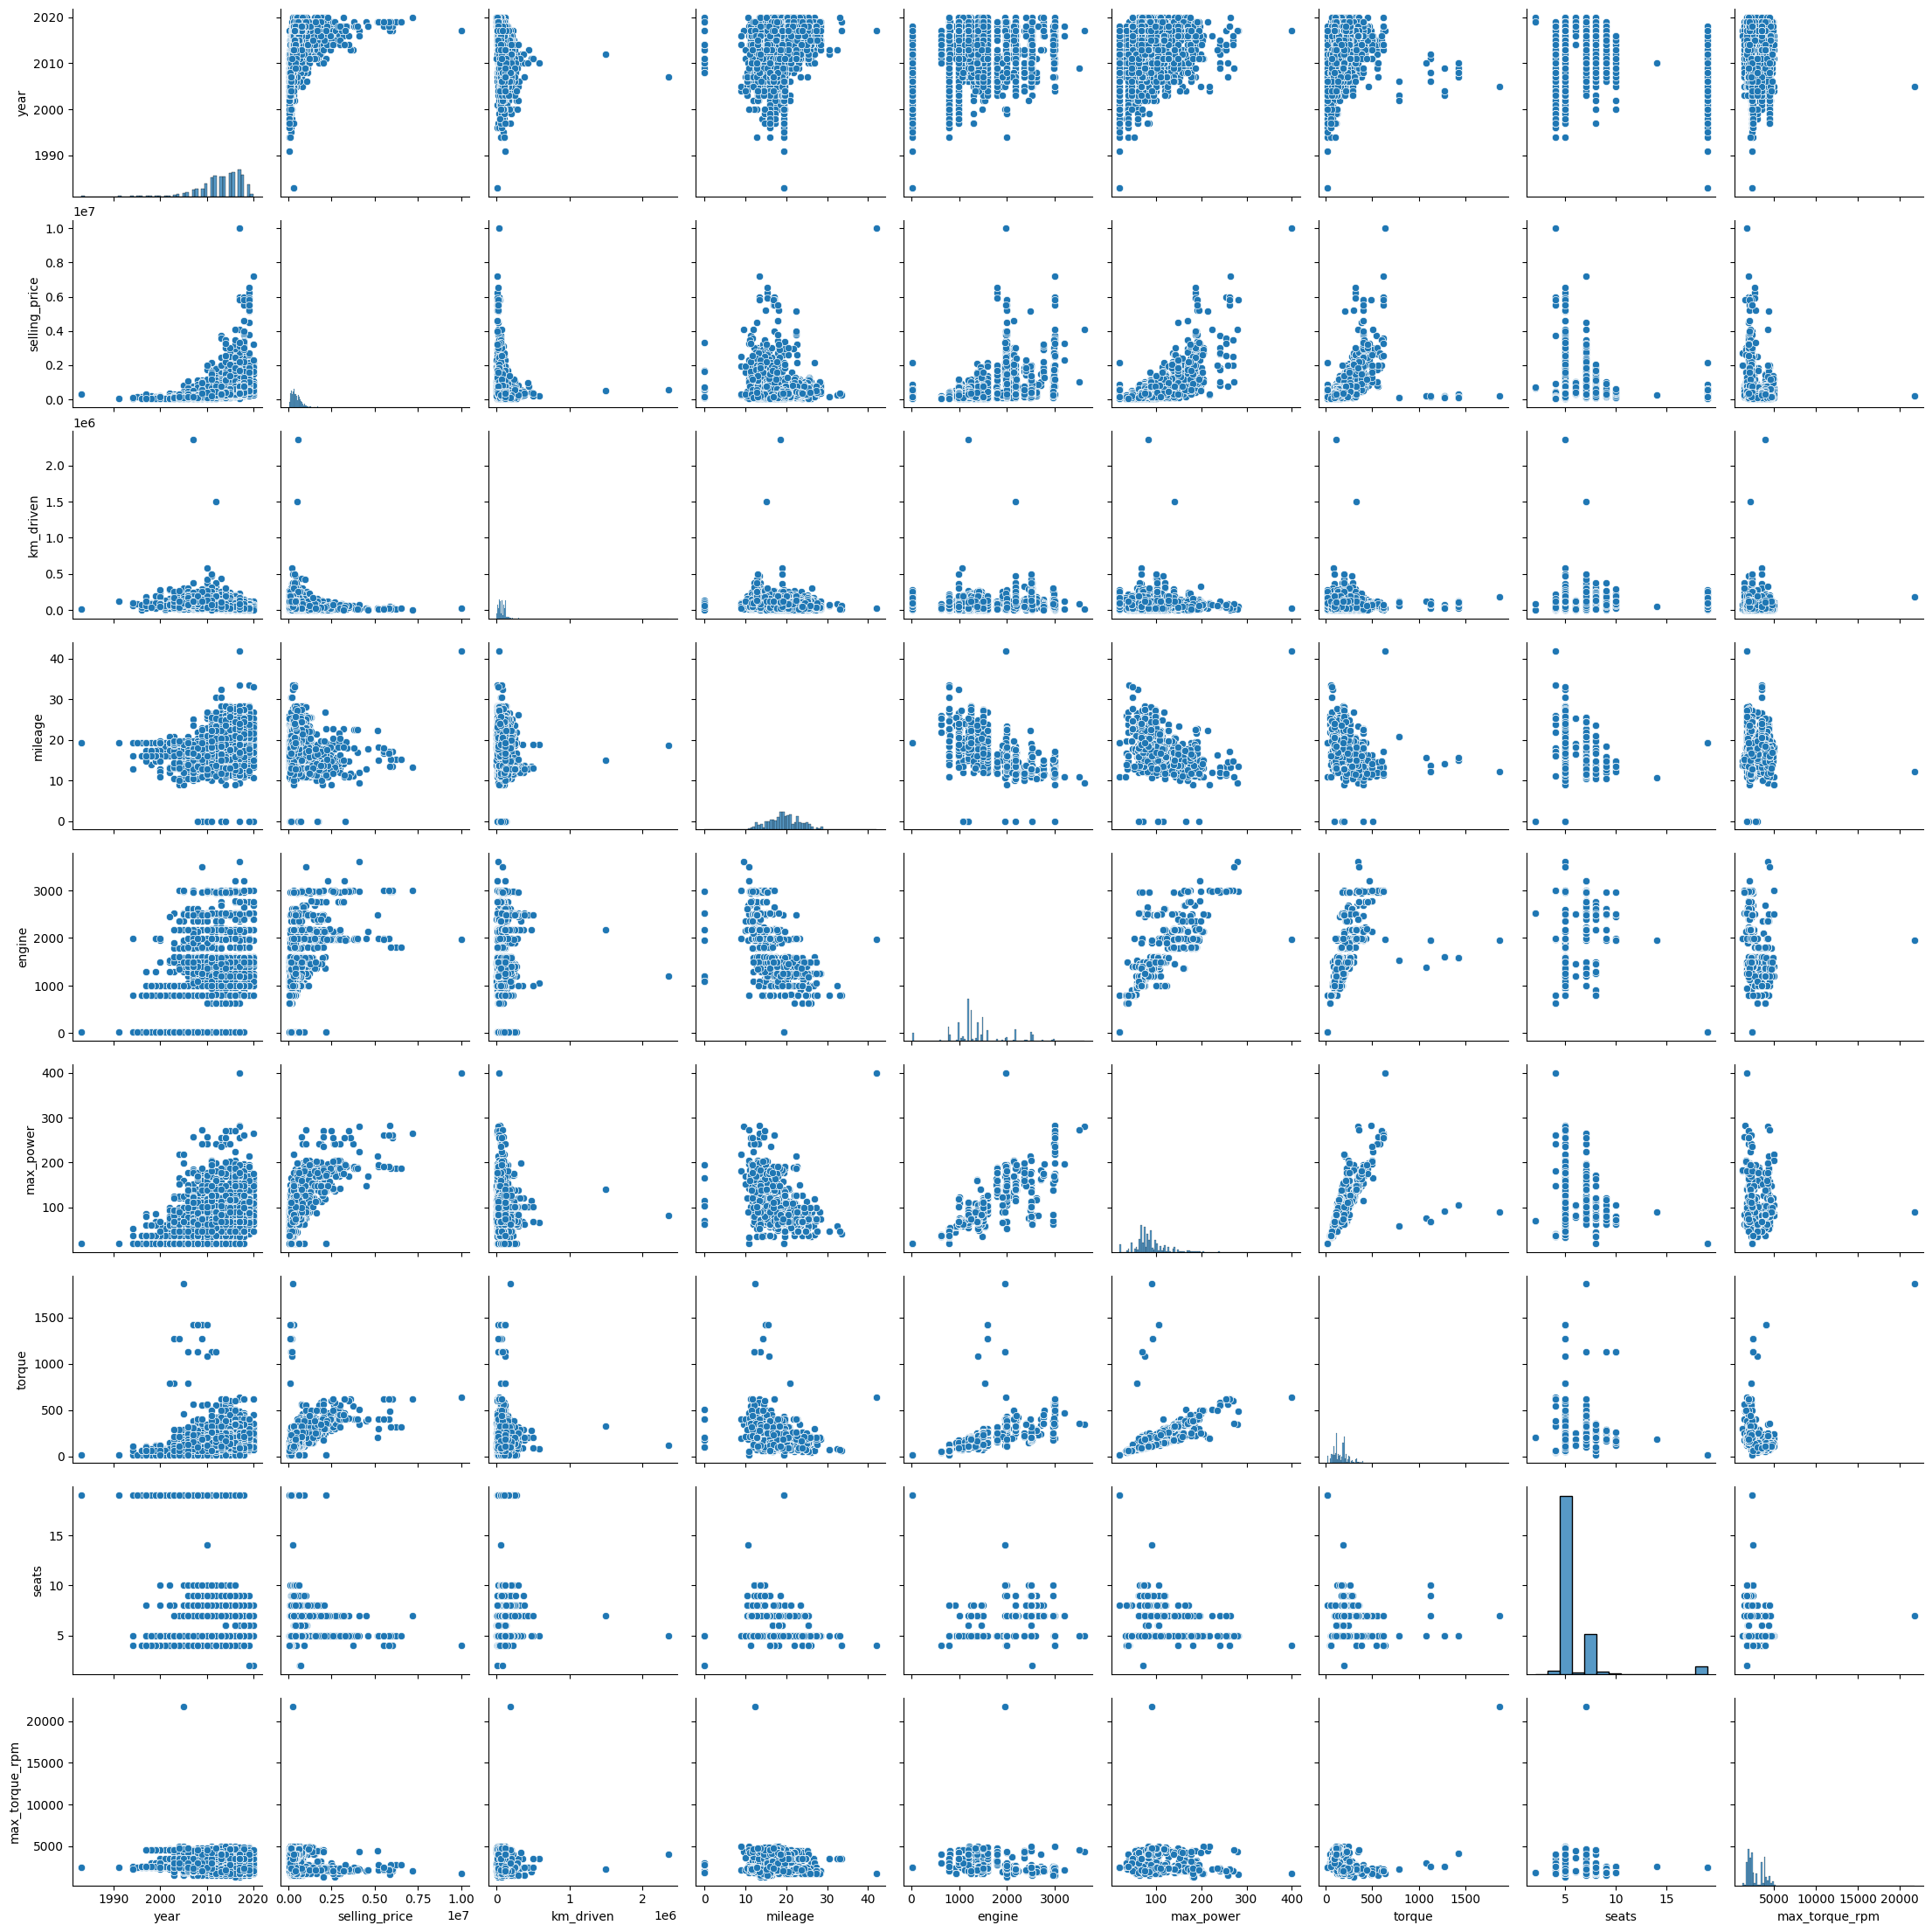

In [29]:
sns.pairplot(df_train)

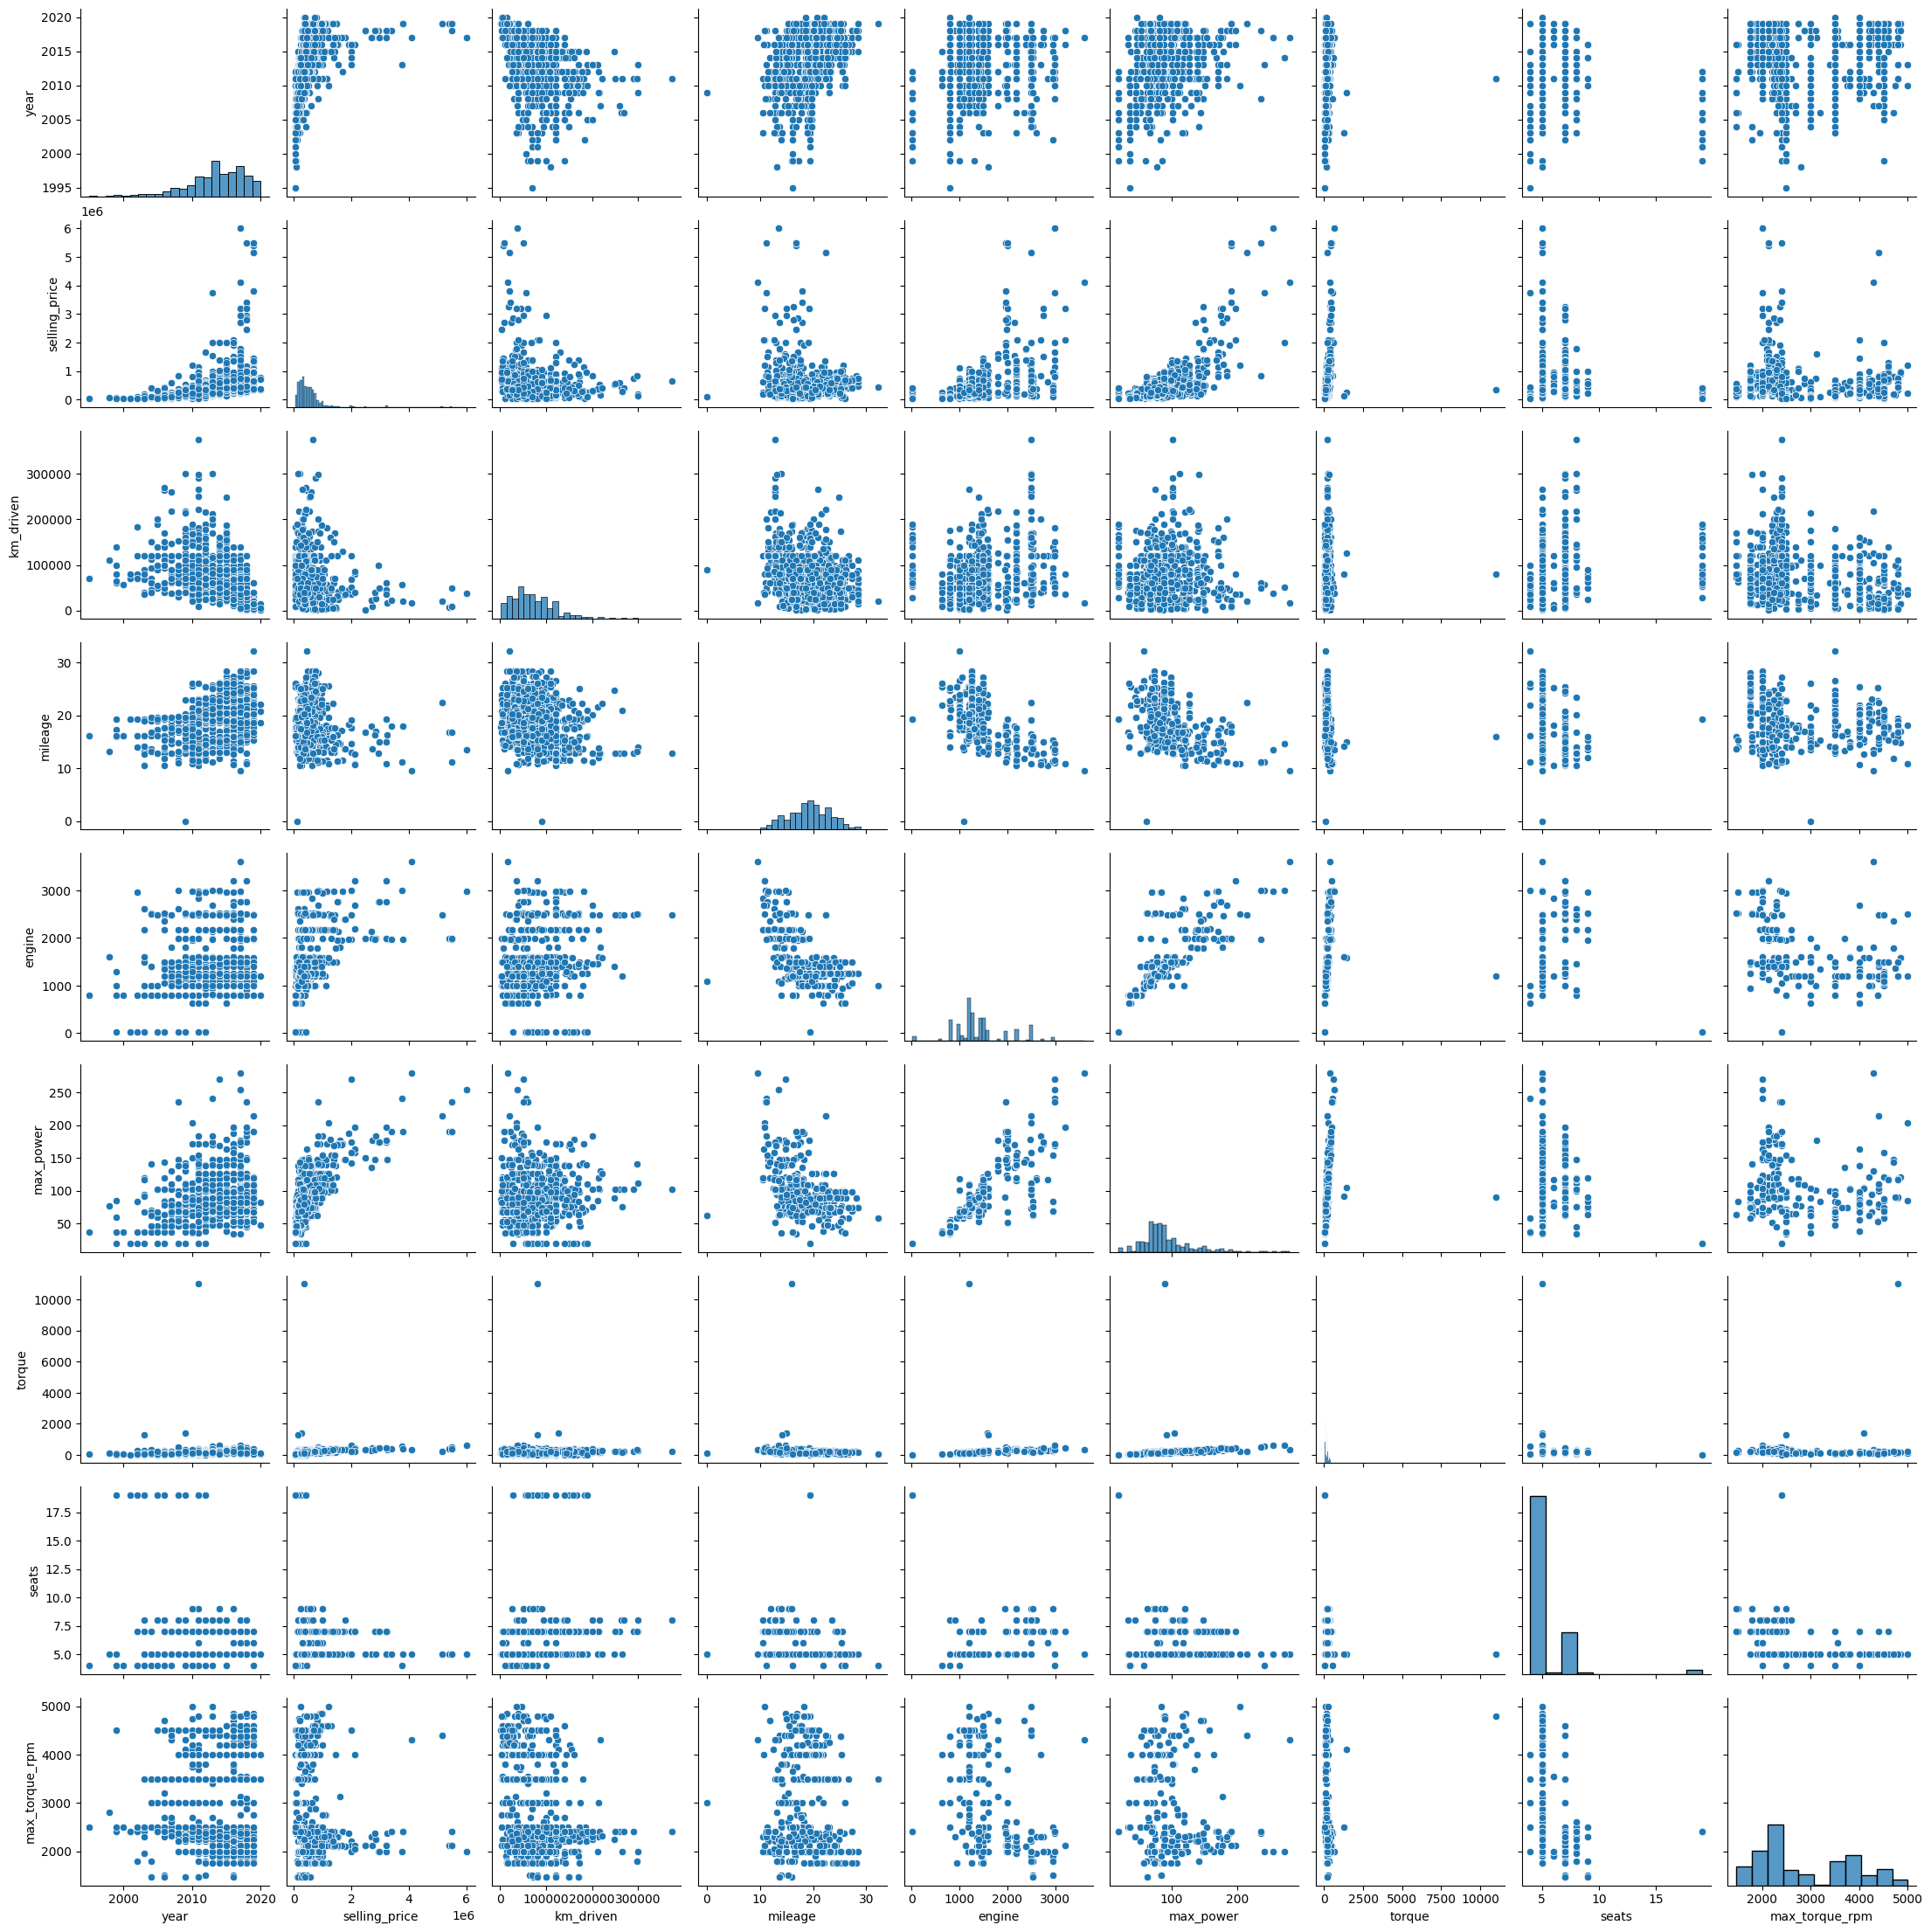

In [30]:
sns.pairplot(df_test)

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

In [31]:
df_train.corr(numeric_only=True)

year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.427279  -0.368966  0.341334  0.110804   
selling_price   0.427279       1.000000  -0.164828 -0.104769  0.439050   
km_driven      -0.368966      -0.164828   1.000000 -0.182086  0.184073   
mileage         0.341334      -0.104769  -0.182086  1.000000 -0.509738   
engine          0.110804       0.439050   0.184073 -0.509738  1.000000   
max_power       0.236558       0.681020   0.005743 -0.347953  0.729639   
torque          0.113231       0.474561   0.097615 -0.229118  0.630572   
seats          -0.245244      -0.038871   0.123512 -0.174740 -0.202310   
max_torque_rpm  0.032678      -0.177878  -0.232456 -0.090629 -0.310542   

                max_power    torque     seats  max_torque_rpm  
year             0.236558  0.113231 -0.245244        0.032678  
selling_price    0.681020  0.474561 -0.038871       -0.177878  
km_driven        0.005743  0.097615  0.123512       -0.232456  
mileage         -0.347953 -0.229118 -0.174740       -0.090629  
engine           0.729639  0.630572 -0.202310       -0.310542  
max_power        1.000000  0.686742 -0.244741       -0.119389  
torque           0.686742  1.000000 -0.113848       -0.339042  
seats           -0.244741 -0.113848  1.000000       -0.193352  
max_torque_rpm  -0.119389 -0.339042 -0.193352        1.000000

<Axes: >

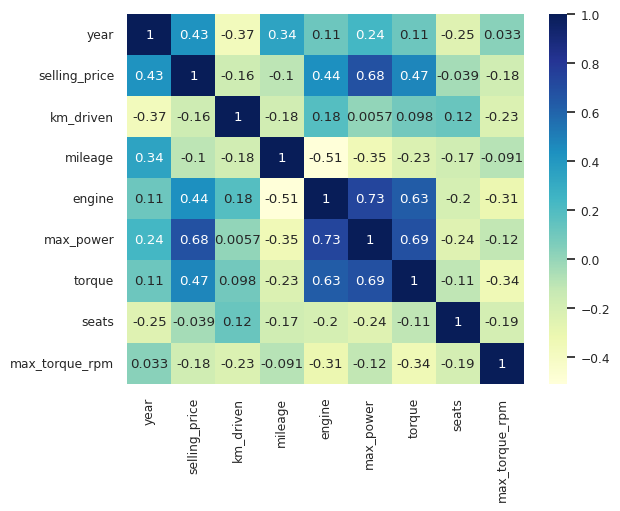

In [32]:
sns.set(font_scale=0.8)
sns.heatmap(df_train.corr(numeric_only=True), cmap="YlGnBu", annot=True)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Наименьшая корреляция наблюдается между признаками:<br>
* max_power и km_driven
* max_torque_rpm и year

Сильная положительная связь наблюдается между:
* engine и max_power
* engine и torque
* max_power и torque

Между годом выпуска и пробегом существует умеренная обратная связь. Это говорит о том, для части данных будет справедливо утверждение, что при уменьшении года выпуска АМ увеличивается пробег АМ, но говорить точно мы об этом не можем

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [33]:
def spearman_corr(x, y):
    x_order = np.argsort(x)
    x_rank = np.argsort(x_order)

    y_order = np.argsort(y)
    y_rank = np.argsort(y_order)

    d = x_rank - y_rank
    n = len(y)

    corr = 1 - (6 * sum(d**2)) / (n * (n**2 - 1))

    return corr

cols = df_train.select_dtypes(['int','float']).columns
result = [[0 for I in range(len(cols))] for _ in range(len(cols))]

for i, val_i in enumerate(cols):
    for j, val_j in enumerate(cols):
        result[i][j] = spearman_corr(df_train[val_i], df_train[val_j])

result = pd.DataFrame(result, index = cols, columns = cols)
result

year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.705060  -0.566218  0.342960  0.033210   
selling_price   0.705060       1.000000  -0.295699  0.026164  0.498019   
km_driven      -0.566218      -0.295699   1.000000 -0.197687  0.261066   
mileage         0.342960       0.026164  -0.197687  1.000000 -0.413206   
engine          0.033210       0.498019   0.261066 -0.413206  1.000000   
max_power       0.225700       0.642090   0.012691 -0.295294  0.745014   
torque          0.165976       0.611533   0.200181 -0.162942  0.858920   
seats          -0.029736       0.145557   0.140158 -0.296325  0.242124   
max_torque_rpm -0.000617      -0.258193  -0.310019 -0.151092 -0.446124   

                max_power    torque     seats  max_torque_rpm  
year             0.225700  0.165976 -0.029736       -0.000617  
selling_price    0.642090  0.611533  0.145557       -0.258193  
km_driven        0.012691  0.200181  0.140158       -0.310019  
mileage         -0.295294 -0.162942 -0.296325       -0.151092  
engine           0.745014  0.858920  0.242124       -0.446124  
max_power        1.000000  0.811017  0.095121       -0.147525  
torque           0.811017  1.000000  0.172470       -0.607540  
seats            0.095121  0.172470  1.000000       -0.207747  
max_torque_rpm  -0.147525 -0.607540 -0.207747        1.000000

In [34]:
df_train.corr(numeric_only=True, method='spearman')

year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.707123  -0.569659  0.346132  0.029200   
selling_price   0.707123       1.000000  -0.295665  0.026186  0.498676   
km_driven      -0.569659      -0.295665   1.000000 -0.198466  0.261821   
mileage         0.346132       0.026186  -0.198466  1.000000 -0.414015   
engine          0.029200       0.498676   0.261821 -0.414015  1.000000   
max_power       0.224811       0.642320   0.013021 -0.295232  0.745773   
torque          0.164142       0.612140   0.201023 -0.162346  0.860050   
seats          -0.059870       0.201914   0.221323 -0.399670  0.340015   
max_torque_rpm  0.002972      -0.257520  -0.310927 -0.153287 -0.445720   

                max_power    torque     seats  max_torque_rpm  
year             0.224811  0.164142 -0.059870        0.002972  
selling_price    0.642320  0.612140  0.201914       -0.257520  
km_driven        0.013021  0.201023  0.221323       -0.310927  
mileage         -0.295232 -0.162346 -0.399670       -0.153287  
engine           0.745773  0.860050  0.340015       -0.445720  
max_power        1.000000  0.811574  0.142423       -0.145857  
torque           0.811574  1.000000  0.256624       -0.608972  
seats            0.142423  0.256624  1.000000       -0.291706  
max_torque_rpm  -0.145857 -0.608972 -0.291706        1.000000

In [35]:
df_train.corr(numeric_only=True, method='spearman') - df_train.corr(numeric_only=True, method='pearson')

year  selling_price  km_driven   mileage    engine  \
year            0.000000       0.279843  -0.200693  0.004798 -0.081603   
selling_price   0.279843       0.000000  -0.130836  0.130955  0.059626   
km_driven      -0.200693      -0.130836   0.000000 -0.016381  0.077748   
mileage         0.004798       0.130955  -0.016381  0.000000  0.095723   
engine         -0.081603       0.059626   0.077748  0.095723  0.000000   
max_power      -0.011747      -0.038700   0.007278  0.052720  0.016134   
torque          0.050912       0.137580   0.103408  0.066772  0.229478   
seats           0.185375       0.240785   0.097811 -0.224930  0.542325   
max_torque_rpm -0.029706      -0.079641  -0.078471 -0.062658 -0.135177   

                max_power    torque     seats  max_torque_rpm  
year            -0.011747  0.050912  0.185375       -0.029706  
selling_price   -0.038700  0.137580  0.240785       -0.079641  
km_driven        0.007278  0.103408  0.097811       -0.078471  
mileage          0.052720  0.066772 -0.224930       -0.062658  
engine           0.016134  0.229478  0.542325       -0.135177  
max_power        0.000000  0.124832  0.387164       -0.026468  
torque           0.124832  0.000000  0.370472       -0.269930  
seats            0.387164  0.370472  0.000000       -0.098354  
max_torque_rpm  -0.026468 -0.269930 -0.098354        0.000000

In [36]:
import phik

df_train.select_dtypes(['float', 'int']).phik_matrix()

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.219841   0.081574  0.279253  0.301058   
selling_price   0.219841       1.000000   0.000000  0.649768  0.491613   
km_driven       0.081574       0.000000   1.000000  0.081625  0.178466   
mileage         0.279253       0.649768   0.081625  1.000000  0.568810   
engine          0.301058       0.491613   0.178466  0.568810  1.000000   
max_power       0.243567       0.763796   0.038858  0.837238  0.789900   
torque          0.186794       0.703445   0.000000  0.344751  0.566930   
seats           0.260722       0.162618   0.093520  0.501881  0.756858   
max_torque_rpm  0.247795       0.242667   0.047452  0.314434  0.482867   

                max_power    torque     seats  max_torque_rpm  
year             0.243567  0.186794  0.260722        0.247795  
selling_price    0.763796  0.703445  0.162618        0.242667  
km_driven        0.038858  0.000000  0.093520        0.047452  
mileage          0.837238  0.344751  0.501881        0.314434  
engine           0.789900  0.566930  0.756858        0.482867  
max_power        1.000000  0.726848  0.470849        0.273540  
torque           0.726848  1.000000  0.258677        0.959489  
seats            0.470849  0.258677  1.000000        0.334648  
max_torque_rpm   0.273540  0.959489  0.334648        1.000000

In [37]:
df_train.corr(numeric_only=True, method='pearson') - df_train.select_dtypes(['float', 'int']).phik_matrix()

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


year  selling_price  km_driven   mileage    engine  \
year            0.000000       0.207438  -0.450540  0.062081 -0.190254   
selling_price   0.207438       0.000000  -0.164828 -0.754537 -0.052562   
km_driven      -0.450540      -0.164828   0.000000 -0.263711  0.005607   
mileage         0.062081      -0.754537  -0.263711  0.000000 -1.078547   
engine         -0.190254      -0.052562   0.005607 -1.078547  0.000000   
max_power      -0.007009      -0.082775  -0.033115 -1.185191 -0.060261   
torque         -0.073564      -0.228884   0.097615 -0.573869  0.063643   
seats          -0.505967      -0.201488   0.029992 -0.676621 -0.959168   
max_torque_rpm -0.215117      -0.420546  -0.279907 -0.405063 -0.793409   

                max_power    torque     seats  max_torque_rpm  
year            -0.007009 -0.073564 -0.505967       -0.215117  
selling_price   -0.082775 -0.228884 -0.201488       -0.420546  
km_driven       -0.033115  0.097615  0.029992       -0.279907  
mileage         -1.185191 -0.573869 -0.676621       -0.405063  
engine          -0.060261  0.063643 -0.959168       -0.793409  
max_power        0.000000 -0.040106 -0.715590       -0.392928  
torque          -0.040106  0.000000 -0.372525       -1.298531  
seats           -0.715590 -0.372525  0.000000       -0.528000  
max_torque_rpm  -0.392928 -1.298531 -0.528000        0.000000

Можно увидеть, что есть различия между корреляциями Пирсона и Спирмена<br>
Например, рассмотрим влияние показателей на целевую переменную:<br>
* Корреляция Спирмена > корреляции Пирсона для year, torque, seats. Следовательно, между показателями существует нелинейная связь

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Исследуем данные на выбросы, построим boxplot по каждой числовой переменной<br>
Видим, что по переменым year, selling_price, mileage, engine, max_power есть выбросы, которые могут повлиять на качество модели<br>
seats мы не рассматриваем, так как у него мало уникальных значений и признак может быть отнесен к категориальным

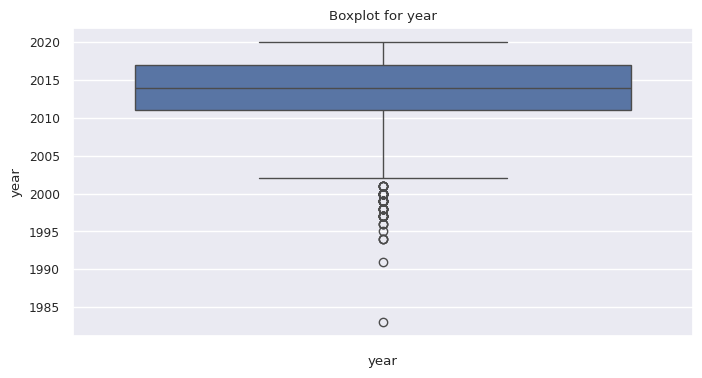

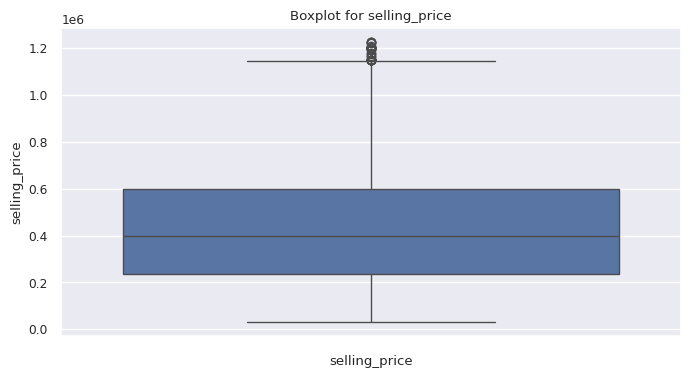

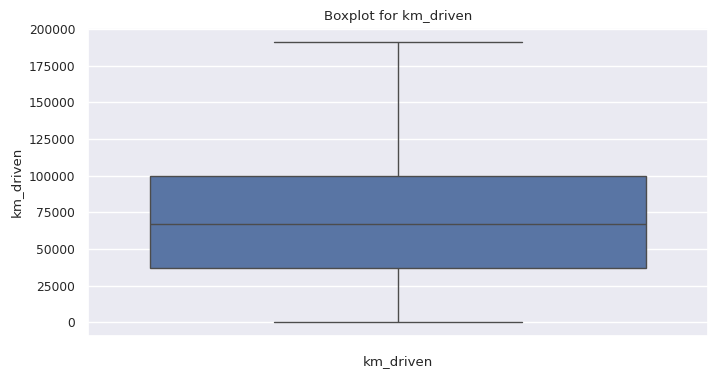

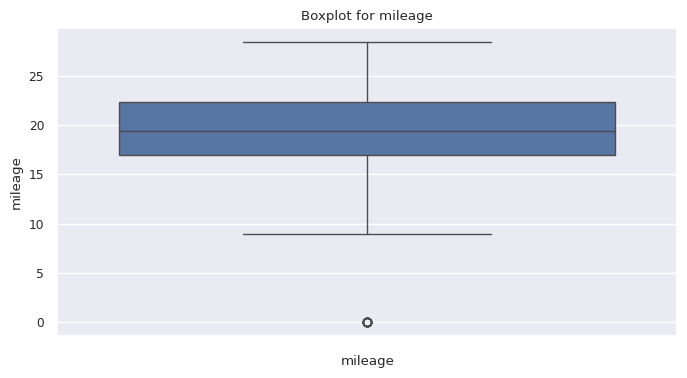

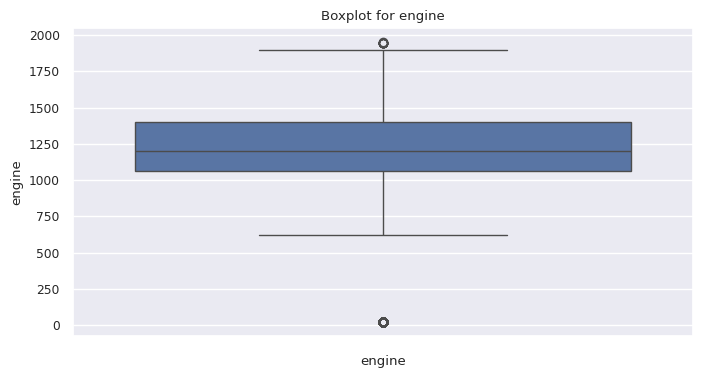

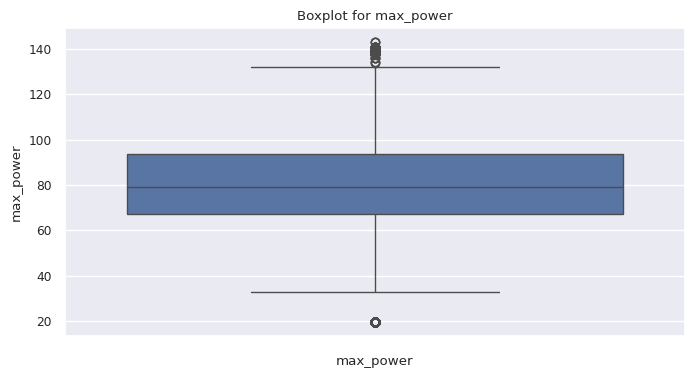

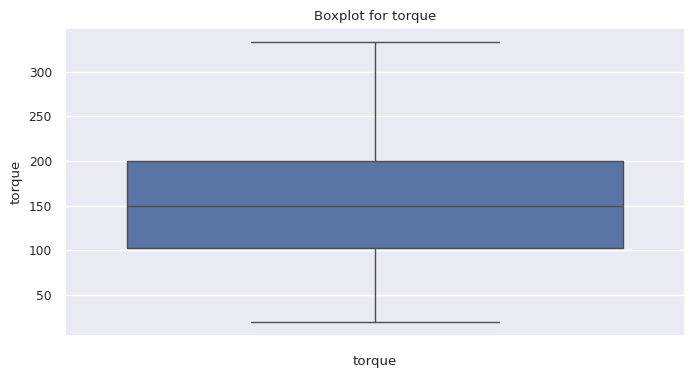

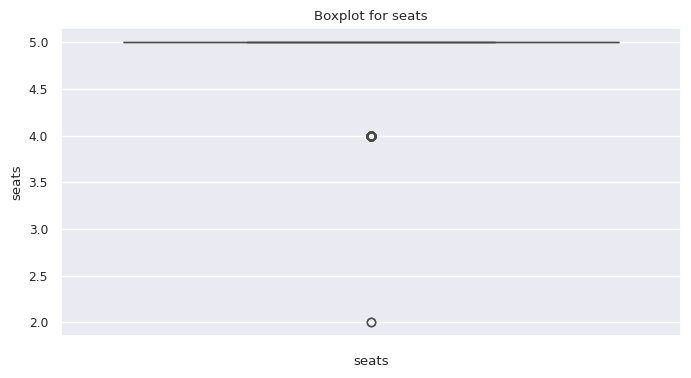

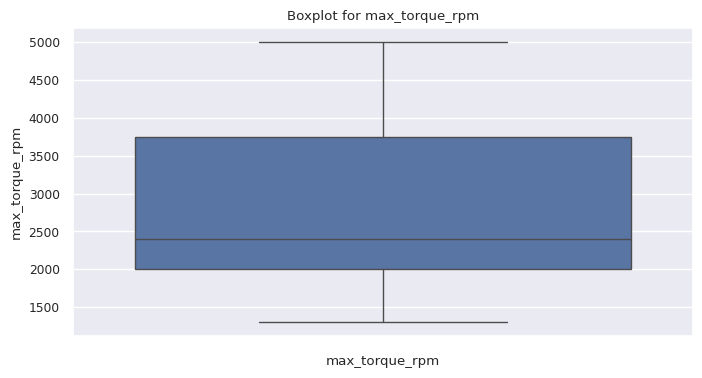

In [38]:
for col in df_train.select_dtypes(['int', 'float']).columns:
    IQR = df_train[col].quantile(0.75) - df_train[col].quantile(0.25)
    h = df_train[col].quantile(0.75) + 1.5 * IQR
    l = df_train[col].quantile(0.25) - 1.5 * IQR

    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_train[df_train[col] <= h][col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [39]:
df_train_copy = df_train.select_dtypes(['int', 'float']).copy(deep=True)
df_test_copy = df_test.select_dtypes(['int', 'float']).copy(deep=True)

Y_train = df_train_copy['selling_price']
X_train = df_train_copy.drop(['selling_price'], axis=1)

X_train.shape

(5840, 8)

Мы предобработали torque и разбили его на 2 поля - torque и max_torque_rpm => количество столбцов больше, чем в assert

In [40]:
#assert X_train.shape == (5840, 6)

In [41]:
Y_test = df_test_copy['selling_price']
X_test = df_test_copy.drop(['selling_price'], axis=1)

In [42]:
#assert X_test.shape == (1000, 6)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr = LinearRegression()
lr.fit(X_train, Y_train)

lr_pred_test = lr.predict(X_test)
lr_pred_train = lr.predict(X_train)

lr_mse_train = MSE(Y_train, lr_pred_train)
lr_r2_train = r2_score(Y_train, lr_pred_train)

lr_mse_test = MSE(Y_test, lr_pred_test)
lr_r2_test = r2_score(Y_test, lr_pred_test)

print(f'Train:\nMSE: {lr_mse_train} R^2: {lr_r2_train}\n\nTest:\nMSE: {lr_mse_test} R^2: {lr_r2_test}')

Train:
MSE: 116317648250.84549 R^2: 0.5942006609540997

Test:
MSE: 238057955250.2475 R^2: 0.5858626838991257


По модели обученной на трейне видно, что она объясняет 59,6% дисперсии<br>
Для теста r^2 отличается не сильно. Это ознаначает, что модель не переобучена и данные для трейна и теста разделены корректно<br>
По значению MSE сложно сделать выводы о качестве модели

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [44]:
def r2_func(y_true, y_pred):
    y_true = y_true.tolist()
    y_pred = y_pred.tolist()

    if len(y_true) != len(y_pred):
        raise Exception(f'length of y_true ({len(y_true)}) not equal to y_pred ({len(y_pred)})')
    if len(y_true) == 0 or len(y_pred) == 0:
        raise Exception(f'No data in dataframe')

    MSE = 0
    mean_delta = 0
    mean_y = sum(y_true)/len(y_true)
    n = len(y_true)

    for i in range(n):
        # Смотрим квадрат отклонения Yi от прогнозного значения
        MSE+=(y_true[i]-y_pred[i])**2

        #Смотрим квадрат отклонения Yi от среднего значения
        mean_delta+=(y_true[i]-mean_y)**2

    r2 = 1-(MSE/mean_delta)

    return r2

In [45]:
r2_train_func = r2_func(Y_train, lr_pred_train)
r2_test_func = r2_func(Y_test, lr_pred_test)

print(f'R^2 train: {r2_train_func}\nR^2 test: {r2_test_func}')

R^2 train: 0.5942006609541004
R^2 test: 0.5858626838991245


В числителе \$R^2$ мы считаем квадрат отклонения i наблюдаемого значения Y от прогнозного Y<br>
В знаменателе мы считаем квадрат отклонения i наблюдаемого значения от среднего наблюдаемого значения Y

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [46]:
def r2_adjusted(y_true, y_pred, feature_n):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    return 1 - (((1-r2) * (n - 1)) / (n - feature_n - 1))

In [47]:
lr_r2_adjusted_train = r2_adjusted(Y_train, lr_pred_train, X_train.shape[1])
lr_r2_adjusted_test = r2_adjusted(Y_test, lr_pred_test, X_test.shape[1])

print(f'Train: {lr_r2_adjusted_train}\nTest: {lr_r2_adjusted_test}')

Train: 0.5936439134472626
Test: 0.582519496685395


$R^2$ adjusted применяется в многофакторной регрессии для оценки влияния признаков на дисперсию<br>
Например, если при добавлении нового признака $R^2$ adjusted снизилась, то данный признак не вносит значимого вклада в модель<br>
Таким образом, можно оставить в датасете только значимые признаки

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

lr2 = LinearRegression()
lr2.fit(X_train_scaler, Y_train)

lr2_pred_test = lr2.predict(X_test_scaler)
lr2_pred_train = lr2.predict(X_train_scaler)

lr2_mse_train = MSE(Y_train, lr2_pred_train)
lr2_r2_train = r2_score(Y_train, lr2_pred_train)

lr2_mse_test = MSE(Y_test, lr2_pred_test)
lr2_r2_test = r2_score(Y_test, lr2_pred_test)

print(f'Train:\nMSE: {lr2_mse_train} R^2: {lr2_r2_train}\n\nTest:\nMSE: {lr2_mse_test} R^2: {lr2_r2_test}')

Train:
MSE: 116317648250.84555 R^2: 0.5942006609540995

Test:
MSE: 238057955250.24857 R^2: 0.5858626838991238


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [49]:
coef = dict(zip(X_train.columns, abs(lr2.coef_)))
coef = dict(sorted(coef.items(), key = lambda item: item[1], reverse = True))
coef

{'max_power': 381678.77150291105,
 'year': 149795.76583624317,
 'seats': 92778.54601887306,
 'max_torque_rpm': 64478.99171874151,
 'engine': 53209.86970302226,
 'km_driven': 52070.25691806013,
 'torque': 2305.7295309410692,
 'mileage': 123.86034030288283}

Наиболее информативным признаком оказался max_power, он вносит наибольший вклад в целевую переменную

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [50]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaler, Y_train)

pred_test_lasso = lasso.predict(X_test_scaler)
pred_train_lasso = lasso.predict(X_train_scaler)

lasso_mse_train = MSE(Y_train, pred_train_lasso)
lasso_r2_train = r2_score(Y_train, pred_train_lasso)

lasso_mse_test = MSE(Y_test, pred_test_lasso)
lasso_r2_test = r2_score(Y_test, pred_test_lasso)

print(f'Train:\nMSE: {lasso_mse_train} R^2: {lasso_r2_train}\n\nTest:\nMSE: {lasso_mse_test} R^2: {lasso_r2_test}')

Train:
MSE: 116317648273.83014 R^2: 0.5942006608739128

Test:
MSE: 238058611577.7993 R^2: 0.5858615421194674


In [51]:
lasso.coef_

array([ 1.49793226e+05, -5.20698906e+04, -1.18825192e+02, -5.32018388e+04,
        3.81675716e+05,  2.30438463e+03,  9.27791379e+04, -6.44755796e+04])

L1 регуляризация не занулила коэффициенты. Следовательно, каждый из показателей вносит значимый вклад в объяснение дисперсии

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [52]:
from sklearn.model_selection import GridSearchCV

params = {'alpha' : [0.01, 0.1, 0.5, 1, 10, 100, 1000, 10000, 100000, 100000]}

gs = GridSearchCV(lasso, params, cv=10, scoring='neg_mean_squared_error')
gs.fit(X_train_scaler, Y_train)

-gs.best_score_, gs.best_estimator_, gs.best_params_

(121257731856.84909, Lasso(alpha=1000), {'alpha': 1000})

In [53]:
lasso_2 = Lasso(alpha=1000)
lasso_2.fit(X_train_scaler, Y_train)

pred_test_lasso_2 = lasso_2.predict(X_test_scaler)
pred_train_lasso_2 = lasso_2.predict(X_train_scaler)

lasso_2_mse_train = MSE(Y_train, pred_train_lasso_2)
lasso_2_r2_train = r2_score(Y_train, pred_train_lasso_2)

lasso_2_mse_test = MSE(Y_test, pred_test_lasso_2)
lasso_2_r2_test = r2_score(Y_test, pred_test_lasso_2)

print(f'Train:\nMSE: {lasso_2_mse_train} R^2: {lasso_2_r2_train}\n\nTest:\nMSE: {lasso_2_mse_test} R^2: {lasso_2_r2_test}')

Train:
MSE: 116330196061.21472 R^2: 0.5941568851966728

Test:
MSE: 238782855552.51746 R^2: 0.584601611714803


In [54]:
lasso.coef_

array([ 1.49793226e+05, -5.20698906e+04, -1.18825192e+02, -5.32018388e+04,
        3.81675716e+05,  2.30438463e+03,  9.27791379e+04, -6.44755796e+04])

GridSearch обучил alpha*cv = 100 моделей<br>
Каждый параметр в param_grid - это список гиперпараметров, которые мы применяем к модели<br>
В нашем случае, alpha - это константа, которая умножается на штраф и увеличивает силу регуляризации (больше alpha - больше сила регуляризации)<br>
Лучший коэффцициент регуляризации - alpha=1000. Веса показателей не занулились

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [55]:
from sklearn.linear_model import ElasticNet
import warnings
from sklearn.exceptions import ConvergenceWarning

params = {'alpha' : [0.01, 0.1, 0.5, 1, 10, 100, 1000, 10000, 100000, 100000], 'l1_ratio' : [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

elastic_net = ElasticNet()

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)

    gs = GridSearchCV(elastic_net, params, cv=10, scoring='neg_mean_squared_error')
    gs.fit(X_train_scaler, Y_train)

-gs.best_score_, gs.best_estimator_, gs.best_params_

(121257731856.84909,
 ElasticNet(alpha=1000, l1_ratio=1),
 {'alpha': 1000, 'l1_ratio': 1})

In [56]:
elastic_net = ElasticNet(alpha=1000, l1_ratio=1)

elastic_net.fit(X_train_scaler, Y_train)

pred_test_elastic_net = elastic_net.predict(X_test_scaler)
pred_train_elastic_net = elastic_net.predict(X_train_scaler)

elastic_net_mse_train = MSE(Y_train, pred_train_elastic_net)
elastic_net_r2_train = r2_score(Y_train, pred_train_elastic_net)

elastic_net_mse_test = MSE(Y_test, pred_test_elastic_net)
elastic_net_r2_test = r2_score(Y_test, pred_test_elastic_net)

print(f'Train:\nMSE: {elastic_net_mse_train} R^2: {elastic_net_r2_train}\n\nTest:\nMSE: {elastic_net_mse_test} R^2: {elastic_net_r2_test}')

Train:
MSE: 116330196061.21472 R^2: 0.5941568851966728

Test:
MSE: 238782855552.51746 R^2: 0.584601611714803


GridSearch обучил alpha $*$ l1_ratio $*$ cv = 1100 моделей<br>
Лучшая модель - это модель Лассо регрессии (l1_ratio=1) с alpha = 1000

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [57]:
# your code here

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [58]:
X_train_cat = pd.DataFrame(X_train_scaler, columns=X_train.columns).copy(deep=True)
brand_model_train = pd.DataFrame([(car.split()[0], car.split()[1]) for car in df_train['name']], columns = ['brand', 'model'])

X_train_cat['brand'] = brand_model_train['brand']
X_train_cat['model'] = brand_model_train['model']

In [59]:
X_train_cat.shape

(5840, 10)

In [60]:
#assert X_train_cat.shape == (5840, 11)

In [61]:
X_train_cat.describe(include='object')

brand  model
count     5840   5840
unique      30    202
top     Maruti  Swift
freq      1804    558

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [62]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

X_train_cat = X_train_cat.drop(['seats'], axis=1)

df_train_ohe = df_train[['fuel', 'seller_type', 'transmission', 'owner', 'seats']].astype('object').copy(deep=True)

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=pd.errors.PerformanceWarning)

    for col in df_train_ohe.columns:
        X_train_cat[col] = df_train_ohe[col]

X_train_cat = pd.get_dummies(X_train_cat, drop_first=True)

In [63]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Columns: 256 entries, year to seats_19
dtypes: bool(249), float64(7)
memory usage: 1.7 MB


### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

В процессе OHE мы преобразуем категориальные признаки в бинарные. Количество уникальных элементов категориальных признаков не должно быть очень большим<br>
Мы используем n-1 столбцов, так как если брать n столбцов, то будет возникать линейная зависимость<br>
Например, если у категории Grade есть значения: Good, Nice и Great, то после OHE мы получаем 2 столбца (например, Grade_Good, Great_Nice). В случае, если Grade_Good = False и Grade_Nice = False, то мы понимаем, что поле Grade_Great имело бы значение True, несмотря на то, что в явном виде оно отсутствует<br>
Мы можем удалить незначимые признаки

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [64]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

params = {'alpha' : [0.01, 0.1, 0.5, 1, 10, 100, 1000, 10000, 100000]}

gs = GridSearchCV(ridge, params, cv=10, scoring='r2')
gs.fit(X_train_cat, Y_train)

-gs.best_score_, gs.best_estimator_, gs.best_params_

(-0.7842397405987855, Ridge(alpha=0.5), {'alpha': 0.5})

In [65]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train_cat, Y_train)

pred_train_ridge = ridge.predict(X_train_cat)

ridge_mse_train = MSE(Y_train, pred_train_ridge)
ridge_r2_train = r2_score(Y_train, pred_train_ridge)

print(f'Train:\nMSE: {ridge_mse_train} R^2: {ridge_r2_train}')

Train:
MSE: 30839395909.847153 R^2: 0.8924100799407295


По сравнению с Lasso регрессией с alpha=100 $R^2$ в Ridge регрессии меньше (так как мы его и минимизируем)

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [33]:
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from datetime import datetime
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error as MSE


df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')


class CleanData(BaseEstimator):
    def __init__(self):
        pass


    @staticmethod
    def cat_to_float(x):
        if isinstance(x, float) or isinstance(x, int):
            return float(x)

        x = x.split()

        if len(x) == 2:
            return float(x[0])
        elif len(x) == 1 and isinstance(x[0], str) and isinstance(x[0], str):
            return np.nan


    @staticmethod
    def torque_to_float(x):
        if isinstance(x, float):
            return np.nan

        x = x.lower()
        for a, b in zip(['~', '@', '(', ')', 'rpm', 'at', ',', '/'], ['-', '', '', '', '', '', '', '']):
            x = x.replace(a, b)

        x = x.strip().split()

        if len(x) == 1:
            x[0] = float(x[0].replace('nm', ''))
            x.append(np.nan)
        elif len(x) == 2:
            if 'nm' in x[0] and 'kgm' in x[0]:
                x[0] = float(max(map(float, x[0].replace('nm', ' ').replace('kgm', ' ').strip().split())))
            elif 'nm' in x[0] and isinstance(x[1], float):
                x[0] = float(x[0].replace('nm', ''))
            elif '+' in x[1]:
                x[1] = float(x[1].split('+')[0])
            elif 'nm' in x[0]:
                x[0] = float(x[0].replace('nm', ''))
            elif 'kgm' in x[0] or 'kgm' in x[1]:
                x[0] = round(float(x[0].replace('kgm', '')) * 9.80665, 2)
                x[1] = x[1].replace('kgm', '')

            if isinstance(x[1], float):
                pass
            elif len(x[1].split('-')) == 2:
                x[1] = sum(map(float, x[1].split('-')))/2
            elif len(x[1].split('-')) == 1:
                x[1] = float(x[1])

        elif len(x) == 3:
            if x[1] == 'nm':
                x.remove('nm')
                x[0] = float(x[0])
            elif x[1] == 'kgm':
                x.remove('kgm')
                x[0] = float(x[0]) * 9.80665

            if '-' in x[1]:
                x[1] = sum(map(float, x[1].split('-')))/2

        if isinstance(x[0], str):
            x[0] = float(x[0].replace('nm', ''))

        return f'{round(float(x[0]), 2)} {round(float(x[1]), 2)}'


    @staticmethod
    def define_age(age):
        if age <= 3:
            return 'New'
        elif age <= 9:
            return 'Used'
        else:
            return 'Old'

    @staticmethod
    def define_performance(max_power):
        if max_power >= 200:
            return 'High Performance'
        elif max_power >= 100:
            return 'Medium Performance'
        else:
            return 'Low Performance'


    def torque_processing(self, X):
        X['torque'] = X['torque'].apply(lambda x: self.torque_to_float(x))
        X['max_torque_rpm'] = X['torque'].astype(str).str.split(' ').str[1].astype(float)
        X['torque'] = X['torque'].astype(str).str.split(' ').str[0].astype(float)

        return X


    def object_to_float_processing(self, X):
        for col in ['mileage', 'engine', 'max_power']:
            X[col] = X[col].apply(lambda x: self.cat_to_float(x))

        return X



    def process_name(self, X):
        brand_model = pd.DataFrame([(car.split()[0], car.split()[1]) for car in X['name']], columns = ['brand', 'model'])

        X['brand'] = brand_model['brand']
        X['model'] = brand_model['model']

        X = X.drop(['name'], axis=1)

        return X


    def generate_columns(self, X):
        current_year = datetime.now().year
        X['age'] = current_year - X['year']
        X['km_per_year'] = X['km_driven'] / X['age']
        X['power_per_litre'] = X['max_power']/ X['engine']/1000
        X['year'] = X['year']**2
        X['age_category'] = X['age'].apply(self.define_age)
        X['performance_category'] = X['max_power'].apply(self.define_performance)

        return X


    def fit(self, X, Y):
        return self


    def transform(self, X):
        X = self.torque_processing(X)
        X = self.object_to_float_processing(X)
        X = self.process_name(X)
        X = self.generate_columns(X)

        X = pd.DataFrame(X)

        return X


df_train.drop_duplicates(subset=df_train.drop(['selling_price'], axis = 1), keep='first', inplace=True, ignore_index=True)

X_train = df_train.drop(['selling_price'], axis=1)
Y_train = df_train['selling_price']

X_test = df_test.drop(['selling_price'], axis=1)
Y_test = df_test['selling_price']


clean_data_pipeline = Pipeline(steps=[
    ('encoder', CleanData())
])

num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm', 'seats', 'age', 'km_per_year', 'power_per_litre']),
        ('cat', cat_pipeline, ['brand', 'model', 'fuel', 'seller_type', 'transmission', 'owner', 'age_category', 'performance_category'])
    ]
)

elastic_net_model = ElasticNet(alpha=0.0001, l1_ratio=0.9)

pipeline = Pipeline(steps=[
    ('all', clean_data_pipeline),
    ('data', preprocessor),
    ('regressor', elastic_net_model)
])

pipeline.fit(X_train, Y_train)

/Users/ivanmahrov/Documents/Education/HSE/2-3_ML/ml_env_3_10/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.081e+13, tolerance: 1.674e+11
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('all', Pipeline(steps=[('encoder', CleanData())])),
                ('data',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'km_driven',
                                                   'mileage', 'engine',
                                                   'max_power', 'torque',
                                                   'max_torque_rpm', 'seats',
                                                   'age', 'km_per_year',
                                                   'power_per_litre']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['brand', 'model', 'fuel',
                                                   'seller_type',
                                                   'transmission', 'owner',
                                                   'age_category',
                                                   'performance_category'])])),
                ('regressor', ElasticNet(alpha=0.0001, l1_ratio=0.9))])

In [67]:
y_pred = pipeline.predict(X_train)
mse = MSE(Y_train, y_pred)
r2 = r2_score(Y_train, y_pred)
print(f"Train:\nr2: {r2}\nMSE: {mse}")

Train:
r2: 0.9045408883764287
MSE: 27362241136.900494


In [68]:
y_pred = pipeline.predict(X_test)
mse = MSE(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print(f"Test:\nr2: {r2}\nMSE: {mse}")

Test:
r2: 0.9202955882333865
MSE: 45816371893.814255


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [69]:
def business_metrics(y_true, y_pred):
    delta = abs((y_true / y_pred) - 1)

    return np.sum(delta < 0.1) / len(y_true)

In [70]:
lr = business_metrics(Y_test, lr_pred_test)
lr_2 = business_metrics(Y_test, lr2_pred_test)
lasso = business_metrics(Y_test, pred_test_lasso)
lasso_2 = business_metrics(Y_test, pred_test_lasso_2)
elastic_net = business_metrics(Y_test, pred_test_elastic_net)
pipeline_model = business_metrics(Y_test, y_pred)

print(f'lr model: {lr}\nlr_2 model: {lr_2}\nlasso model: {lasso}\nlasso_2 model: {lasso_2}\nelastic_net: {elastic_net}\npipeline_model: {pipeline_model}')

lr model: 0.252
lr_2 model: 0.252
lasso model: 0.252
lasso_2 model: 0.258
elastic_net: 0.258
pipeline_model: 0.324


Наилучшей моделью оказалась модель ElasticNet, для которой данные были предварительно предобработаны в pipeline

In [34]:
import joblib

joblib.dump(pipeline, 'pipeline.pickle')

['pipeline.pickle']

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [72]:
def your_business_metrics(y_true, y_pred):
    delta = y_true - y_pred

    under = delta[delta < 0]
    over = delta[delta > 0]

    coef = abs(sum(under)) / len(under) * 2 + sum(over) / len(over)

    return coef

In [73]:
lr = your_business_metrics(Y_test, lr_pred_test)
lr_2 = your_business_metrics(Y_test, lr2_pred_test)
lasso = your_business_metrics(Y_test, pred_test_lasso)
lasso_2 = your_business_metrics(Y_test, pred_test_lasso_2)
elastic_net = your_business_metrics(Y_test, pred_test_elastic_net)
pipeline_model = your_business_metrics(Y_test, y_pred)

print(f'lr model: {lr}\nlr_2 model: {lr_2}\nlasso model: {lasso}\nlasso_2 model: {lasso_2}\nelastic_net: {elastic_net}\npipeline_model: {pipeline_model}')

lr model: 609802.9832674307
lr_2 model: 609802.9832674221
lasso model: 609801.0769143843
lasso_2 model: 608091.6420454024
elastic_net: 608091.6420454024
pipeline_model: 335242.36640814476


Считаем среднее отклонение для недопрогноза и перепрогноза<br>
Средний недопрогноз штрафуем больше, чем перепрогноз

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI, UploadFile, File, responses
from pydantic import BaseModel
from typing import List
import joblib
import pandas as pd
import uvicorn
from io import StringIO
from sklearn.base import BaseEstimator
from datetime import datetime
import numpy as np


app = FastAPI()

class CleanData(BaseEstimator):
    def __init__(self):
        pass


    @staticmethod
    def cat_to_float(x):
        if isinstance(x, float) or isinstance(x, int):
            return float(x)

        x = x.split()

        if len(x) == 2:
            return float(x[0])
        elif len(x) == 1 and isinstance(x[0], str) and isinstance(x[0], str):
            return np.nan


    @staticmethod
    def torque_to_float(x):
        if isinstance(x, float):
            return np.nan

        x = x.lower()
        for a, b in zip(['~', '@', '(', ')', 'rpm', 'at', ',', '/'], ['-', '', '', '', '', '', '', '']):
            x = x.replace(a, b)

        x = x.strip().split()

        if len(x) == 1:
            x[0] = float(x[0].replace('nm', ''))
            x.append(np.nan)
        elif len(x) == 2:
            if 'nm' in x[0] and 'kgm' in x[0]:
                x[0] = float(max(map(float, x[0].replace('nm', ' ').replace('kgm', ' ').strip().split())))
            elif 'nm' in x[0] and isinstance(x[1], float):
                x[0] = float(x[0].replace('nm', ''))
            elif '+' in x[1]:
                x[1] = float(x[1].split('+')[0])
            elif 'nm' in x[0]:
                x[0] = float(x[0].replace('nm', ''))
            elif 'kgm' in x[0] or 'kgm' in x[1]:
                x[0] = round(float(x[0].replace('kgm', '')) * 9.80665, 2)
                x[1] = x[1].replace('kgm', '')

            if isinstance(x[1], float):
                pass
            elif len(x[1].split('-')) == 2:
                x[1] = sum(map(float, x[1].split('-')))/2
            elif len(x[1].split('-')) == 1:
                x[1] = float(x[1])

        elif len(x) == 3:
            if x[1] == 'nm':
                x.remove('nm')
                x[0] = float(x[0])
            elif x[1] == 'kgm':
                x.remove('kgm')
                x[0] = float(x[0]) * 9.80665

            if '-' in x[1]:
                x[1] = sum(map(float, x[1].split('-')))/2

        if isinstance(x[0], str):
            x[0] = float(x[0].replace('nm', ''))

        return f'{round(float(x[0]), 2)} {round(float(x[1]), 2)}'


    @staticmethod
    def define_age(age):
        if age <= 3:
            return 'New'
        elif age <= 9:
            return 'Used'
        else:
            return 'Old'

    @staticmethod
    def define_performance(max_power):
        if max_power >= 200:
            return 'High Performance'
        elif max_power >= 100:
            return 'Medium Performance'
        else:
            return 'Low Performance'


    def torque_processing(self, X):
        X['torque'] = X['torque'].apply(lambda x: self.torque_to_float(x))
        X['max_torque_rpm'] = X['torque'].astype(str).str.split(' ').str[1].astype(float)
        X['torque'] = X['torque'].astype(str).str.split(' ').str[0].astype(float)

        return X


    def object_to_float_processing(self, X):
        for col in ['mileage', 'engine', 'max_power']:
            X[col] = X[col].apply(lambda x: self.cat_to_float(x))

        return X



    def process_name(self, X):
        brand_model = pd.DataFrame([(car.split()[0], car.split()[1]) for car in X['name']], columns = ['brand', 'model'])

        X['brand'] = brand_model['brand']
        X['model'] = brand_model['model']

        X = X.drop(['name'], axis=1)

        return X


    def generate_columns(self, X):
        current_year = datetime.now().year
        X['age'] = current_year - X['year']
        X['km_per_year'] = X['km_driven'] / X['age']
        X['power_per_litre'] = X['max_power']/ X['engine']/1000
        X['year'] = X['year']**2
        X['age_category'] = X['age'].apply(self.define_age)
        X['performance_category'] = X['max_power'].apply(self.define_performance)

        return X


    def fit(self, X, Y):
        return self


    def transform(self, X):
        X = self.torque_processing(X)
        X = self.object_to_float_processing(X)
        X = self.process_name(X)
        X = self.generate_columns(X)

        X = pd.DataFrame(X)

        return X


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    car_info = pd.DataFrame([dict(item).values()],columns=list(dict(item).keys()))

    return model.predict(car_info)


@app.post("/predict_items")
async def predict_items(file: UploadFile = File(...)):
    contents = await file.read()

    df = pd.read_csv(StringIO(contents.decode("utf-8")))
    df_predict = df.copy(deep=True)
    
    selling_price_forecast = model.predict(df_predict)
    df['selling_price_forecast'] = selling_price_forecast

    df.to_csv('test_forecast.csv', index=False) 

    return responses.FileResponse('test_forecast.csv', media_type='text/csv', filename='test_forecast.csv')

if __name__ == "__main__":
    model = joblib.load('pipeline.pickle')
    uvicorn.run(app, host="127.0.0.1", port=8000)


ModuleNotFoundError: No module named 'fastapi'

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>

Предполагаю, что это кот Елены Кантонистовой